<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Placement" data-toc-modified-id="Placement-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Placement</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Race" data-toc-modified-id="Race-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Race</a></span></li><li><span><a href="#Primary-tracks" data-toc-modified-id="Primary-tracks-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Primary tracks</a></span></li><li><span><a href="#Pathrise-status" data-toc-modified-id="Pathrise-status-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Pathrise status</a></span></li><li><span><a href="#Professional-Experience" data-toc-modified-id="Professional-Experience-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Professional Experience</a></span></li><li><span><a href="#Education" data-toc-modified-id="Education-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Education</a></span></li><li><span><a href="#Placement-by-program-duration" data-toc-modified-id="Placement-by-program-duration-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Placement by program duration</a></span></li><li><span><a href="#Placement-by-gender" data-toc-modified-id="Placement-by-gender-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Placement by gender</a></span></li><li><span><a href="#Placement-by-educational-experience" data-toc-modified-id="Placement-by-educational-experience-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Placement by educational experience</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Correlations</a></span></li></ul></li></ul></div>

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
data_df = pd.read_excel("Data_Pathrise.xlsx")
data_df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


# Functions

In [83]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.7, .6, f"N = {n}", transform=ax.transAxes)

# EDA

In [107]:
data_df.isna().sum()

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                           0
race                            18
dtype: int64

In [114]:
for column in data_df.columns:
    print(column)
    print("------")
    print(data_df[column].unique())
    print("\n")

id
------
[   1    2    3 ... 2542 2543 2544]


pathrise_status
------
['Active' 'Closed Lost' 'Placed' 'Withdrawn (Failed)' 'Withdrawn (Trial)'
 'Withdrawn' 'Deferred' 'Break' 'MIA']


primary_track
------
['SWE' 'PSO' 'Design' 'Data' 'Web' 'Marketing']


cohort_tag
------
['OCT19A' 'JAN20A' 'AUG19B' 'AUG19A' 'SEP19A' 'AUG19C' 'DEC19A' 'FEB20A'
 'NOV19A' 'NOV19B' 'JAN20B' 'FEB20B' 'JUL19B' 'APR20A' 'OCT18A' 'SEP18C'
 'OCT18B' 'JAN19A' 'MAR19A' 'FEB19A' 'FEB19B' 'APR19A' 'AUG18A' 'DEC18A'
 'MAR19B' 'JAN19B' 'JUN19B' 'SEP18B' 'NOV18A' 'SEP18A' 'APR19B' 'MAY19A'
 'JUL19A' 'JUN19A' 'FEB18A' 'JUN18A' 'MAR18A' 'APR18A' 'APR18B' 'MAY18A'
 'OCT21A' 'SEP19B' 'MAR20A' 'MAY19B' 'FEB20a' 'OCT19B' 'JAN18A' nan]


program_duration_days
------
[ nan   0.  89.  19.  13. 158.  12.  52.  11.  93. 193.  73. 286.   5.
   7.  83.  14.  16.  15.  76.  44.  26. 223.  65. 305. 187. 142. 101.
 266. 170. 332. 153. 156.  27. 143. 245. 243. 178. 233.  45. 192.  87.
 271. 129. 110.  36. 317.  10. 171.  62.  69. 1

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [7]:
data_df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


## Placement


956 fellows have been placed out of a total of 2544 fellows for a ratio of 0.38.


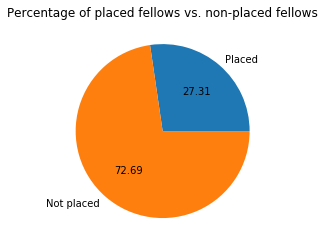

In [50]:
placed_df = data_df.loc[data_df["placed"] == 1]
print(f'{placed_df.shape[0]} fellows have been placed out of a total of {data_df.shape[0]} fellows \
for a ratio of {round(placed_df.shape[0] / data_df.shape[0],2)}.')

plt.pie(x=[placed_df.shape[0],data_df.shape[0]],
        labels=["Placed","Not placed"],
       autopct='%.2f')
plt.title("Percentage of placed fellows vs. non-placed fellows")
plt.show()

## Gender


In [95]:
print(data_df.gender.unique())
data_df.gender = data_df.gender.fillna("Decline to Self Identify")

['Male' 'Female' 'Decline to Self Identify' 'Non-Binary']


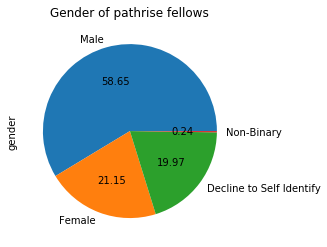

In [58]:
data_df.gender.value_counts().plot(kind='pie',autopct='%.2f')
plt.title("Gender of pathrise fellows")
plt.show()

## Race

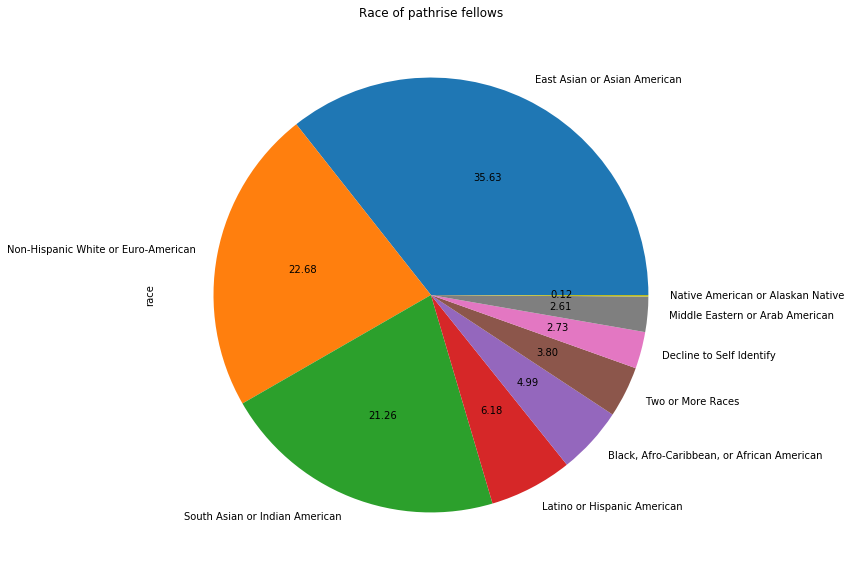

In [60]:
plt.figure(figsize=(10,10))
data_df.race.value_counts().plot(kind='pie',autopct='%.2f')
plt.title("Race of pathrise fellows")
plt.show()

## Primary tracks

SWE          1678
PSO           322
Design        288
Data          248
Web             6
Marketing       2
Name: primary_track, dtype: int64


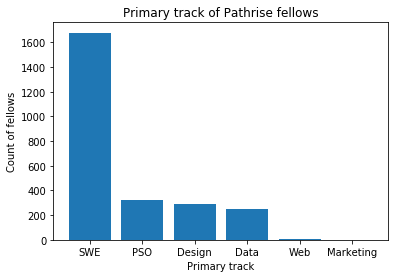

In [57]:
print(data_df.primary_track.value_counts())

plt.bar(data_df.primary_track.value_counts().index, 
        data_df.primary_track.value_counts().values)
plt.xlabel("Primary track")
plt.ylabel("Count of fellows")
plt.title("Primary track of Pathrise fellows")
plt.show()

## Pathrise status

Placed                956
Active                532
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: pathrise_status, dtype: int64


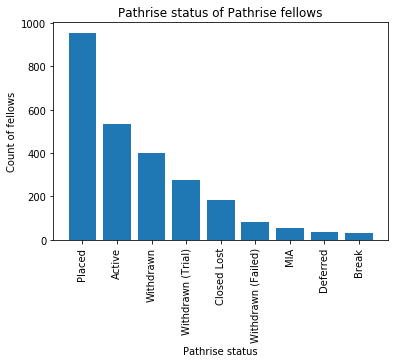

In [56]:
print(data_df.pathrise_status.value_counts())

plt.bar(data_df.pathrise_status.value_counts().index, 
        data_df.pathrise_status.value_counts().values)
plt.xticks(rotation=90)
plt.xlabel("Pathrise status")
plt.ylabel("Count of fellows")
plt.title("Pathrise status of Pathrise fellows")
plt.show()

## Professional Experience

1-2 years             882
Less than one year    618
3-4 years             558
5+ years              264
Name: professional_experience, dtype: int64


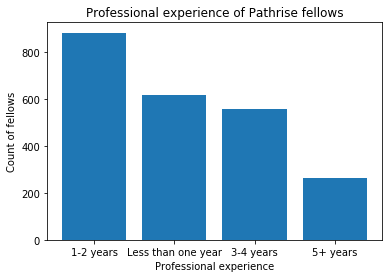

In [94]:
print(data_df.professional_experience.value_counts())

plt.bar(data_df.professional_experience.value_counts().index, 
        data_df.professional_experience.value_counts().values)
plt.xlabel("Professional experience")
plt.ylabel("Count of fellows")
plt.title("Professional experience of Pathrise fellows")
plt.show()

## Education

Bachelor's Degree                   1361
Master's Degree                      810
Doctorate or Professional Degree     135
Some College, No Degree              135
High School Graduate                  15
GED or equivalent                     15
Some High School                      15
Name: highest_level_of_education, dtype: int64


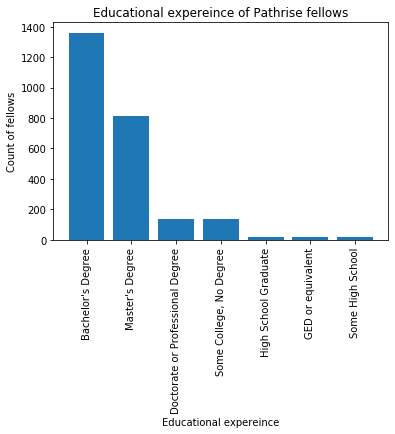

In [55]:
print(data_df.highest_level_of_education.value_counts())

plt.bar(data_df.highest_level_of_education.value_counts().index, 
        data_df.highest_level_of_education.value_counts().values)
plt.xticks(rotation=90)
plt.xlabel("Educational experience")
plt.ylabel("Count of fellows")
plt.title("Educational expereince of Pathrise fellows")
plt.show()

## Placement by program duration

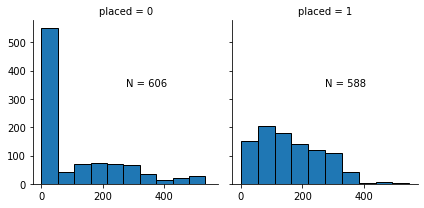

In [67]:
g = sns.FacetGrid(data_df, col='placed')
g.map(plt.hist, "program_duration_days",edgecolor="black")
g.map_dataframe(annotate)
plt.show()

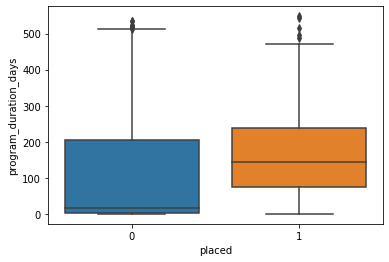

In [65]:
sns.boxplot(x=data_df.placed, y=data_df.program_duration_days)
plt.show()

## Placement by gender

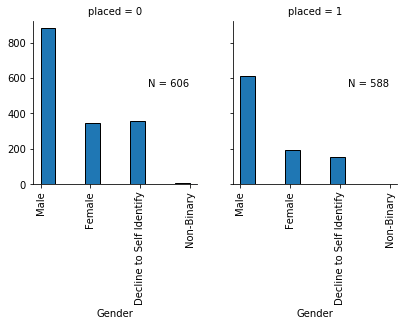

In [92]:
g = sns.FacetGrid(data_df, col='placed')
g.map(plt.hist, "gender",edgecolor="black")
g.map_dataframe(annotate)
g.set_xticklabels(rotation=90)
g.axes[0,0].set_xlabel('Gender')
g.axes[0,1].set_xlabel('Gender')
plt.show()

## Placement by educational experience

<Figure size 720x720 with 0 Axes>

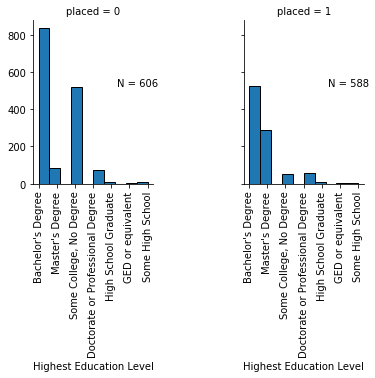

In [97]:
plt.figure(figsize=(10,10))
g = sns.FacetGrid(data_df, col='placed')
g.map(plt.hist, "highest_level_of_education",edgecolor="black")
g.map_dataframe(annotate)
g.set_xticklabels(rotation=90)
g.axes[0,0].set_xlabel('Highest Education Level')
g.axes[0,1].set_xlabel('Highest Education Level')
plt.show()

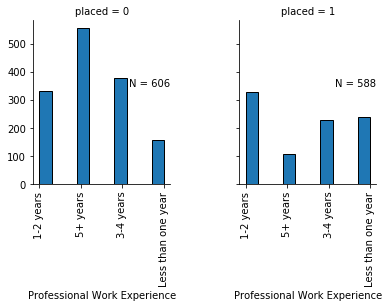

In [90]:
g = sns.FacetGrid(data_df, col='placed')
g.map(plt.hist, "professional_experience",edgecolor="black")
g.map_dataframe(annotate)
g.set_xticklabels(rotation=90)
g.axes[0,0].set_xlabel('Professional Work Experience')
g.axes[0,1].set_xlabel('Professional Work Experience')
plt.show()

## Correlations

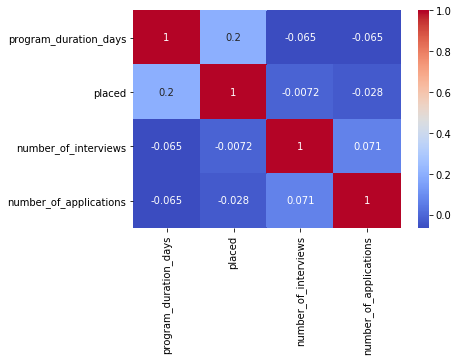

In [106]:
corr_df = data_df.drop(columns="id").corr()
sns.heatmap(corr_df,cmap="coolwarm",annot=True)
plt.show()